<a href="https://colab.research.google.com/github/asala1994/Capstone-Project-IBM/blob/master/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bcn=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Certification/Capstone Project/population.csv')

In [ ]:
bcn.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [ ]:
bcn['ADDRESS']=bcn['Neighborhood.Name'] + ', ' + bcn['District.Name'] + ', Barcelona'

In [ ]:
bcn.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number,ADDRESS
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224,"el Raval, Ciutat Vella, Barcelona"
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50,"el Barri Gòtic, Ciutat Vella, Barcelona"
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43,"la Barceloneta, Ciutat Vella, Barcelona"
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95,"Sant Pere, Santa Caterina i la Ribera, Ciutat ..."
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124,"el Fort Pienc, Eixample, Barcelona"


In [ ]:
bcn1=bcn[['District.Name','Neighborhood.Name', 'ADDRESS']]

In [ ]:
bcn1.head()

,District.Name,Neighborhood.Name,ADDRESS
0,Ciutat Vella,el Raval,"el Raval, Ciutat Vella, Barcelona"
1,Ciutat Vella,el Barri Gòtic,"el Barri Gòtic, Ciutat Vella, Barcelona"
2,Ciutat Vella,la Barceloneta,"la Barceloneta, Ciutat Vella, Barcelona"
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Sant Pere, Santa Caterina i la Ribera, Ciutat ..."
4,Eixample,el Fort Pienc,"el Fort Pienc, Eixample, Barcelona"


In [ ]:
bcn1 = bcn1.drop_duplicates('Neighborhood.Name')

In [ ]:
bcn1.head(80)

,District.Name,Neighborhood.Name,ADDRESS
0,Ciutat Vella,el Raval,"el Raval, Ciutat Vella, Barcelona"
1,Ciutat Vella,el Barri Gòtic,"el Barri Gòtic, Ciutat Vella, Barcelona"
2,Ciutat Vella,la Barceloneta,"la Barceloneta, Ciutat Vella, Barcelona"
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Sant Pere, Santa Caterina i la Ribera, Ciutat ..."
4,Eixample,el Fort Pienc,"el Fort Pienc, Eixample, Barcelona"
5,Eixample,la Sagrada Família,"la Sagrada Família, Eixample, Barcelona"
6,Eixample,la Dreta de l'Eixample,"la Dreta de l'Eixample, Eixample, Barcelona"
7,Eixample,l'Antiga Esquerra de l'Eixample,"l'Antiga Esquerra de l'Eixample, Eixample, Bar..."
8,Eixample,la Nova Esquerra de l'Eixample,"la Nova Esquerra de l'Eixample, Eixample, Barc..."
9,Eixample,Sant Antoni,"Sant Antoni, Eixample, Barcelona"


In [ ]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent= 'myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
bcn1['location'] = bcn1['ADDRESS'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
bcn1['point'] = bcn1['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
bcn1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(bcn1['point'].tolist(), index=bcn1.index)

In [ ]:
bcn1.head(80)

,District.Name,Neighborhood.Name,ADDRESS,location,point,latitude,longitude,altitude
0,Ciutat Vella,el Raval,"el Raval, Ciutat Vella, Barcelona","(el Raval, Ciutat Vella, Barcelona, Barcelonès...","(41.3795176, 2.1683678, 0.0)",41.379518,2.168368,0.0
1,Ciutat Vella,el Barri Gòtic,"el Barri Gòtic, Ciutat Vella, Barcelona","(Barri Gòtic, el Gòtic, Ciutat Vella, Barcelon...","(41.3833947, 2.1769119, 0.0)",41.383395,2.176912,0.0
2,Ciutat Vella,la Barceloneta,"la Barceloneta, Ciutat Vella, Barcelona","(la Barceloneta, Ciutat Vella, Barcelona, Barc...","(41.3806533, 2.1899274, 0.0)",41.380653,2.189927,0.0
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Sant Pere, Santa Caterina i la Ribera, Ciutat ...","(Barcelona, Moll de Barcelona, el Raval, Ciuta...","(41.372251, 2.1775315, 0.0)",41.372251,2.177532,0.0
4,Eixample,el Fort Pienc,"el Fort Pienc, Eixample, Barcelona","(el Fort Pienc, Eixample, Barcelona, Barcelonè...","(41.3959246, 2.1823245, 0.0)",41.395925,2.182325,0.0
5,Eixample,la Sagrada Família,"la Sagrada Família, Eixample, Barcelona","(Basílica de la Sagrada Família, Carrer de Mal...","(41.4034789, 2.1744103330097055, 0.0)",41.403479,2.174410,0.0
6,Eixample,la Dreta de l'Eixample,"la Dreta de l'Eixample, Eixample, Barcelona","(la Dreta de l'Eixample, Eixample, Barcelona, ...","(41.39412395, 2.166470697643847, 0.0)",41.394124,2.166471,0.0
7,Eixample,l'Antiga Esquerra de l'Eixample,"l'Antiga Esquerra de l'Eixample, Eixample, Bar...","(l'Antiga Esquerra de l'Eixample, Eixample, Ba...","(41.38876465, 2.156597362161013, 0.0)",41.388765,2.156597,0.0
8,Eixample,la Nova Esquerra de l'Eixample,"la Nova Esquerra de l'Eixample, Eixample, Barc...","(la Nova Esquerra de l'Eixample, Eixample, Bar...","(41.3828159, 2.1499663437362098, 0.0)",41.382816,2.149966,0.0
9,Eixample,Sant Antoni,"Sant Antoni, Eixample, Barcelona","(Universitat de Barcelona, Carrer de Pelai, Sa...","(41.3868913, 2.1635238457663224, 0.0)",41.386891,2.163524,0.0


In [ ]:
bcn1=bcn1.dropna()

In [ ]:
address = 'Barcelona, Spain'

geolocator = Nominatim(user_agent="BCN_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barcelona City are 41.3828939, 2.1774322.


In [ ]:
neighborhoods=bcn1

In [ ]:
# create map of BCN using latitude and longitude values
map_bcn = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['District.Name'], neighborhoods['Neighborhood.Name']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn)  
    
map_bcn

In [ ]:
CLIENT_ID = 'CF154MGAK3T13E1X43Z53WJBSHSPYOAC2WOIMIQO1HOJQXXT' # your Foursquare ID
CLIENT_SECRET = 'AYHAD4K0AXZ42YFQSN0CKORFN1IIJBMIBVRC3KHA33N1IOCT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CF154MGAK3T13E1X43Z53WJBSHSPYOAC2WOIMIQO1HOJQXXT
CLIENT_SECRET:AYHAD4K0AXZ42YFQSN0CKORFN1IIJBMIBVRC3KHA33N1IOCT


In [ ]:
address = 'Arago 4, Barcelona, Spain'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.4041622 2.1816598


In [ ]:
bcn1.loc[0, 'Neighborhood.Name']

'el Raval'

In [ ]:
neighborhood_latitude = bcn1.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = bcn1.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = bcn1.loc[0, 'Neighborhood.Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of el Raval are 41.3795176, 2.1683678.


In [ ]:
# type your answer here

LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL



'https://api.foursquare.com/v2/venues/explore?&client_id=CF154MGAK3T13E1X43Z53WJBSHSPYOAC2WOIMIQO1HOJQXXT&client_secret=AYHAD4K0AXZ42YFQSN0CKORFN1IIJBMIBVRC3KHA33N1IOCT&v=20180604&ll=41.3795176,2.1683678&radius=500&limit=200'

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef61c34f9762512a1777f06'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-547901fc498eb0f50ce007a4-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d155941735',
         'name': 'Gastropub',
         'pluralName': 'Gastropubs',
         'primary': True,
         'shortName': 'Gastropub'}],
       'id': '547901fc498eb0f50ce007a4',
       'location': {'address': 'Robadors 18',
        'cc': 'ES',
        'city': 'Barcelona',
        'country': 'España',
        'crossStreet': 'Ronda Sant Pau',
        'distance': 175,
        'formattedAddress': ['Robadors 18 (Ronda Sant Pau)',
         '08001 Barcelona Cataluña',
         'España'],
        'labeledLatLngs': 

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,La Robadora,Gastropub,41.379500,2.170463
1,Arume,Spanish Restaurant,41.378953,2.166008
2,Chulapio,Cocktail Bar,41.379264,2.165905
3,Cera 23,Spanish Restaurant,41.378947,2.166180
4,La Monroe,Spanish Restaurant,41.378795,2.170692


In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        categoryId = ["4d4b7105d754a06374d81259"] 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            ",".join(categoryId))
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
bcn_venues = getNearbyVenues(names=bcn1['Neighborhood.Name'],
                                   latitudes=bcn1['latitude'],
                                   longitudes=bcn1['longitude']
                                  )

el Raval
el Barri Gòtic
la Barceloneta
Sant Pere, Santa Caterina i la Ribera
el Fort Pienc
la Sagrada Família
la Dreta de l'Eixample
l'Antiga Esquerra de l'Eixample
la Nova Esquerra de l'Eixample
Sant Antoni
el Poble Sec
la Marina del Prat Vermell
la Marina de Port
la Font de la Guatlla
Hostafrancs
la Bordeta
Sants - Badal
Sants
les Corts
la Maternitat i Sant Ramon
Pedralbes
Sarrià
les Tres Torres
Sant Gervasi - la Bonanova
Sant Gervasi - Galvany
el Putxet i el Farró
Vallcarca i els Penitents
el Coll
la Salut
la Vila de Gràcia
el Camp d'en Grassot i Gràcia Nova
el Baix Guinardó
Can Baró
el Guinardó
la Font d'en Fargues
el Carmel
la Teixonera
Sant Genís dels Agudells
Montbau
la Vall d'Hebron
la Clota
Horta
Vilapicina i la Torre Llobeta
Porta
el Turó de la Peira
Can Peguera
la Guineueta
Canyelles
les Roquetes
Verdun
la Prosperitat
la Trinitat Nova
Torre Baró
Ciutat Meridiana
Vallbona
la Trinitat Vella
Baró de Viver
el Bon Pastor
Sant Andreu
la Sagrera
el Congrés i els Indians
Navas
el Ca

In [ ]:
bcn_venues.shape

(2497, 7)

In [ ]:
bcn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,el Raval,41.379518,2.168368,La Robadora,41.379500,2.170463,Gastropub
1,el Raval,41.379518,2.168368,Arume,41.378953,2.166008,Spanish Restaurant
2,el Raval,41.379518,2.168368,Cera 23,41.378947,2.166180,Spanish Restaurant
3,el Raval,41.379518,2.168368,La Monroe,41.378795,2.170692,Spanish Restaurant
4,el Raval,41.379518,2.168368,A Tu Bola,41.380096,2.169054,Tapas Restaurant


In [ ]:
bcn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Baró de Viver,8,8,8,8,8,8
Can Baró,21,21,21,21,21,21
Can Peguera,8,8,8,8,8,8
Canyelles,6,6,6,6,6,6
Ciutat Meridiana,6,6,6,6,6,6
Diagonal Mar i el Front Marítim del Poblenou,28,28,28,28,28,28
Horta,31,31,31,31,31,31
Hostafrancs,55,55,55,55,55,55
Montbau,11,11,11,11,11,11


In [ ]:
print('There are {} uniques categories.'.format(len(bcn_venues['Venue Category'].unique())))

There are 88 uniques categories.


In [ ]:
# one hot encoding
bcn_onehot = pd.get_dummies(bcn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bcn_onehot['Neighborhood'] = bcn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bcn_onehot.columns[-1]] + list(bcn_onehot.columns[:-1])
bcn_onehot = bcn_onehot[fixed_columns]

bcn_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Grilled Meat Restaurant,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Noodle House,Paella Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,South American Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
bcn_onehot.shape

(2873, 276)

In [ ]:
bcn_grouped = bcn_onehot.groupby('Neighborhood').mean().reset_index()
bcn_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cambodian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Grilled Meat Restaurant,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Noodle House,Paella Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,South American Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Baró de Viver,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Can Baró,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.000000,0.00,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.047619,0.000000,0.00,0.000000,0.000000
2,Can Peguera,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Canyelles,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.3

In [ ]:
set(bcn1['Neighborhood.Name']) ^ set(bcn_grouped['Neighborhood'])

{'Torre Baró'}

In [ ]:
num_top_venues = 5

for hood in bcn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bcn_grouped[bcn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baró de Viver----
              venue  freq
0        Restaurant  0.25
1  Asian Restaurant  0.12
2             Diner  0.12
3     Deli / Bodega  0.12
4  Tapas Restaurant  0.12


----Can Baró----
                venue  freq
0              Bakery  0.19
1  Spanish Restaurant  0.19
2          Restaurant  0.10
3    Tapas Restaurant  0.10
4  Chinese Restaurant  0.10


----Can Peguera----
               venue  freq
0               Café  0.25
1         Restaurant  0.12
2               Food  0.12
3   Tapas Restaurant  0.12
4  German Restaurant  0.12


----Canyelles----
                      venue  freq
0                      Café  0.33
1                Food Court  0.17
2          Tapas Restaurant  0.17
3  Mediterranean Restaurant  0.17
4                      Food  0.17


----Ciutat Meridiana----
              venue  freq
0              Café  0.33
1      Burger Joint  0.17
2  Tapas Restaurant  0.17
3              Food  0.17
4        Restaurant  0.17


----Diagonal Mar i el Front Marítim del Po

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bcn_grouped['Neighborhood']

for ind in np.arange(bcn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bcn_grouped.iloc[ind, :], num_top_venues)



In [ ]:
bcn_grouped.shape

(71, 89)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot(x, y):
  plt.plot(x, y, 'o-')
  plt.figure(figsize = (20,10))
  plt.xlabel("No. of clusters")
  plt.ylabel("Silhouette Score")
  plt.show()

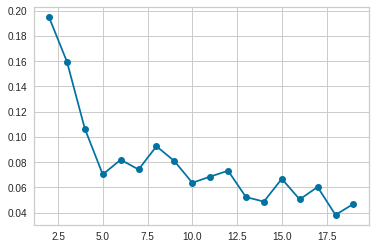

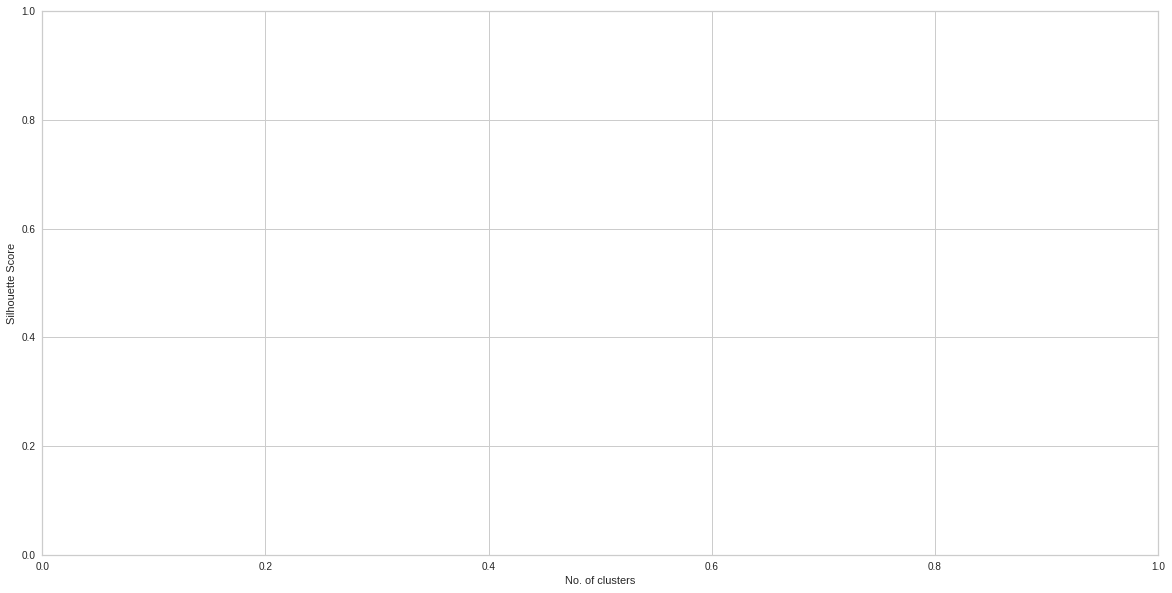

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
indices = []
scores = []
bcn_grouped_clustering = bcn_grouped.drop('Neighborhood', 1)
for kclusters in range(2, 20) :
  bgc = bcn_grouped_clustering
  kmeans = KMeans(n_clusters = kclusters, init = 'k-means++',
  random_state = 0).fit_predict(bgc)
  score = silhouette_score(bgc, kmeans, metric='euclidean')
  indices.append(kclusters)
  scores.append(score)
plot(indices, scores )
optimal_value = np.argmax(scores) + 2

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.metrics import calinski_harabasz_score

distortions = []
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    # mixtureModel = GaussianMixture(n_components=k)
    kmeanModel.fit(bcn_grouped_clustering)
    # mixtureModel.fit(bcn_grouped_clustering)
    labels = kmeanModel.predict(bcn_grouped_clustering)
    # labels = mixtureModel.predict(bcn_grouped_clustering)
    # distortions.append(mixtureModel.aic(bcn_grouped_clustering))
    # distortions.append(calinski_harabasz_score(bcn_grouped_clustering, labels))
    distortions.append(kmeanModel.inertia_)

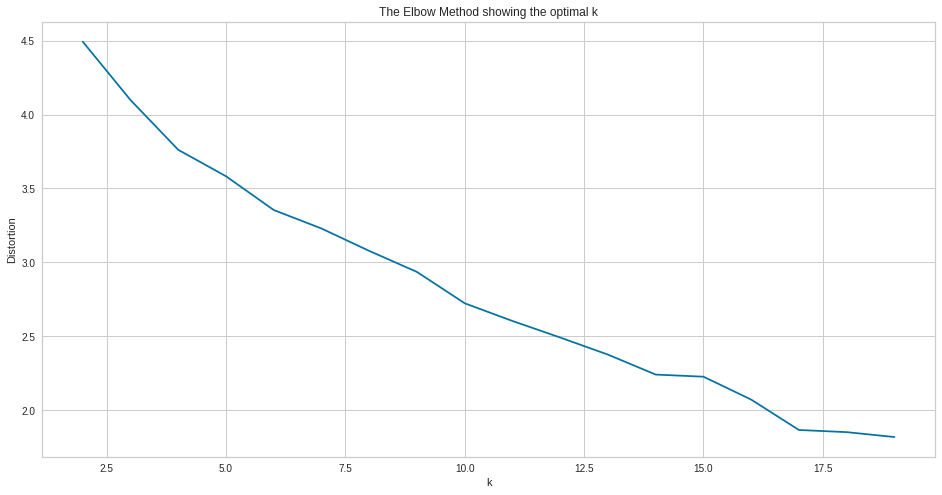

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [ ]:
# set number of clusters
kclusters = 8

bcn_grouped_clustering = bcn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bcn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 0, 7, 7, 7, 1, 1, 1, 4, 4], dtype=int32)

In [ ]:
bcn_grouped_clustering.shape

(71, 88)

In [ ]:
bcn1=bcn1[bcn1['Neighborhood.Name'] != 'Torre Baró']

In [ ]:
# add clustering labels
#neighborhoods_venues_sorted= neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#values = bcn_grouped[bcn_grouped["Neighborhood"] == neighborhoods_venues_sorted["Neighborhood"]][bcn_grouped_clustering.keys()]
#neighborhoods_venues_sorted["Neighborhood"] = kmeans.predict(values)
bcn_merged = bcn1



In [ ]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Baró de Viver,Restaurant,Food,Deli / Bodega,Asian Restaurant,Tapas Restaurant,Café
1,Can Baró,Spanish Restaurant,Bakery,Tapas Restaurant,Restaurant,Chinese Restaurant,Turkish Restaurant
2,Can Peguera,Café,Breakfast Spot,German Restaurant,Restaurant,Tapas Restaurant,Food Court
3,Canyelles,Café,Food,Tapas Restaurant,Food Court,Mediterranean Restaurant,Fish & Chips Shop
4,Ciutat Meridiana,Café,Restaurant,Tapas Restaurant,Food,Burger Joint,Wings Joint


In [ ]:
neighborhoods_venues_sorted['Cluster Labels'].shape

(71,)

In [ ]:
bcn_merged['Cluster Labels'].shape
bcn_merged.head()

,District.Name,Neighborhood.Name,ADDRESS,location,point,latitude,longitude,altitude,Cluster Labels
0,Ciutat Vella,el Raval,"el Raval, Ciutat Vella, Barcelona","(el Raval, Ciutat Vella, Barcelona, Barcelonès...","(41.3795176, 2.1683678, 0.0)",41.379518,2.168368,0.0,7.0
1,Ciutat Vella,el Barri Gòtic,"el Barri Gòtic, Ciutat Vella, Barcelona","(Barri Gòtic, el Gòtic, Ciutat Vella, Barcelon...","(41.3833947, 2.1769119, 0.0)",41.383395,2.176912,0.0,0.0
2,Ciutat Vella,la Barceloneta,"la Barceloneta, Ciutat Vella, Barcelona","(la Barceloneta, Ciutat Vella, Barcelona, Barc...","(41.3806533, 2.1899274, 0.0)",41.380653,2.189927,0.0,7.0
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","Sant Pere, Santa Caterina i la Ribera, Ciutat ...","(Barcelona, Moll de Barcelona, el Raval, Ciuta...","(41.372251, 2.1775315, 0.0)",41.372251,2.177532,0.0,7.0
4,Eixample,el Fort Pienc,"el Fort Pienc, Eixample, Barcelona","(el Fort Pienc, Eixample, Barcelona, Barcelonè...","(41.3959246, 2.1823245, 0.0)",41.395925,2.182325,0.0,7.0


In [ ]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bcn_merged= bcn_merged.drop(['Cluster Labels'], axis=1)
bcn_merged = bcn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood.Name')
#bcn_merged['Cluster Labels'] = neighborhoods_venues_sorted['Cluster Labels']
#bcn_merged # check the last columns!


In [277]:
bcn_merged[['Neighborhood.Name','Cluster Labels']].to_csv('bcn_clusters.csv')

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bcn_merged['latitude'], bcn_merged['longitude'], bcn_merged['Neighborhood.Name'], bcn_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 4, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
12,la Marina de Port,41.360296,2.137584,0.0,4,Spanish Restaurant,Bakery,Café,Mediterranean Restaurant,Breakfast Spot,Diner
16,Sants - Badal,41.375466,2.127710,0.0,4,Bakery,Café,Pizza Place,Tapas Restaurant,Italian Restaurant,Restaurant
22,Sarrià,41.399373,2.121513,0.0,4,Bakery,Mediterranean Restaurant,Café,Tapas Restaurant,Breakfast Spot,Diner
26,el Putxet i el Farró,41.407476,2.143283,0.0,4,Bakery,Café,Italian Restaurant,Mediterranean Restaurant,Burger Joint,Spanish Restaurant
28,el Coll,41.417907,2.148075,0.0,4,Café,Bakery,Mediterranean Restaurant,Mac & Cheese Joint,Wings Joint,Fondue Restaurant
29,la Salut,41.411866,2.153961,0.0,4,Spanish Restaurant,Sandwich Place,Café,Bakery,Restaurant,Diner
32,el Baix Guinardó,41.411441,2.168510,0.0,4,Bakery,Tapas Restaurant,Japanese Restaurant,Breakfast Spot,Café,Pizza Place
38,Sant Genís dels Agudells,41.426457,2.137491,0.0,4,Breakfast Spot,Tapas Restaurant,Café,Bakery,Diner,Food
39,Montbau,41.429550,2.144538,0.0,4,Bakery,Restaurant,Spanish Restaurant,Chinese Restaurant,Mediterranean Restaurant,Food
41,la Clota,41.428646,2.153520,0.0,4,Bakery,Breakfast Spot,Asian Restaurant,Chinese Restaurant,Café,Spanish Restaurant


Cluster 2

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 1, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,el Raval,41.379518,2.168368,0.0,1,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Café,Pizza Place,Seafood Restaurant
1,el Barri Gòtic,41.383395,2.176912,0.0,1,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Italian Restaurant,Café,Vegetarian / Vegan Restaurant
2,la Barceloneta,41.380653,2.189927,0.0,1,Tapas Restaurant,Mediterranean Restaurant,Paella Restaurant,Spanish Restaurant,Seafood Restaurant,Burger Joint
3,"Sant Pere, Santa Caterina i la Ribera",41.372251,2.177532,0.0,1,Mediterranean Restaurant,Restaurant,Chinese Restaurant,Food Truck,Bistro,Diner
4,el Fort Pienc,41.395925,2.182325,0.0,1,Café,Sandwich Place,Chinese Restaurant,Spanish Restaurant,Mediterranean Restaurant,Bakery
5,la Sagrada Família,41.403479,2.174410,0.0,1,Restaurant,Italian Restaurant,Café,Bakery,Mexican Restaurant,Burger Joint
6,la Dreta de l'Eixample,41.394124,2.166471,0.0,1,Tapas Restaurant,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Café,Seafood Restaurant
7,l'Antiga Esquerra de l'Eixample,41.388765,2.156597,0.0,1,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Japanese Restaurant,Café,Bakery
8,la Nova Esquerra de l'Eixample,41.382816,2.149966,0.0,1,Café,Mediterranean Restaurant,Spanish Restaurant,Breakfast Spot,Japanese Restaurant,Indian Restaurant
9,Sant Antoni,41.386891,2.163524,0.0,1,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Bakery,Burger Joint


Cluster 3

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 2, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
11,la Marina del Prat Vermell,41.353842,2.142318,0.0,2,Spanish Restaurant,Food,Gastropub,Bakery,Mediterranean Restaurant,Breakfast Spot
37,la Teixonera,41.423173,2.145970,0.0,2,Spanish Restaurant,Bakery,Mediterranean Restaurant,Café,Wings Joint,Dumpling Restaurant
40,la Vall d'Hebron,41.424789,2.142317,0.0,2,Bakery,Spanish Restaurant,Café,Mediterranean Restaurant,Food,Diner
49,les Roquetes,41.448882,2.174841,0.0,2,Spanish Restaurant,Diner,Falafel Restaurant,Mediterranean Restaurant,Fish & Chips Shop,Donut Shop
52,la Trinitat Nova,41.449556,2.182717,0.0,2,Spanish Restaurant,Chinese Restaurant,Mediterranean Restaurant,Breakfast Spot,Wings Joint,Dumpling Restaurant
59,Sant Andreu,41.500088,2.160464,0.0,2,Mediterranean Restaurant,Spanish Restaurant,Café,Pizza Place,Restaurant,Bakery


Cluster 4

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 3, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
20,Pedralbes,41.390140,2.112218,0.0,3,Café,Mediterranean Restaurant,Hot Dog Joint,Restaurant,Spanish Restaurant,Pizza Place
27,Vallcarca i els Penitents,41.415712,2.141469,0.0,3,Café,Snack Place,Bakery,Restaurant,Burger Joint,Pizza Place
36,el Carmel,41.425591,2.154959,0.0,3,Restaurant,Café,Bakery,Food Court,Wings Joint,Fish & Chips Shop
58,el Bon Pastor,41.436110,2.204807,0.0,3,Café,Restaurant,Tapas Restaurant,Italian Restaurant,Bakery,Mediterranean Restaurant


Cluster 5

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 4, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
12,la Marina de Port,41.360296,2.137584,0.0,4,Spanish Restaurant,Bakery,Café,Mediterranean Restaurant,Breakfast Spot,Diner
16,Sants - Badal,41.375466,2.127710,0.0,4,Bakery,Café,Pizza Place,Tapas Restaurant,Italian Restaurant,Restaurant
22,Sarrià,41.399373,2.121513,0.0,4,Bakery,Mediterranean Restaurant,Café,Tapas Restaurant,Breakfast Spot,Diner
26,el Putxet i el Farró,41.407476,2.143283,0.0,4,Bakery,Café,Italian Restaurant,Mediterranean Restaurant,Burger Joint,Spanish Restaurant
28,el Coll,41.417907,2.148075,0.0,4,Café,Bakery,Mediterranean Restaurant,Mac & Cheese Joint,Wings Joint,Fondue Restaurant
29,la Salut,41.411866,2.153961,0.0,4,Spanish Restaurant,Sandwich Place,Café,Bakery,Restaurant,Diner
32,el Baix Guinardó,41.411441,2.168510,0.0,4,Bakery,Tapas Restaurant,Japanese Restaurant,Breakfast Spot,Café,Pizza Place
38,Sant Genís dels Agudells,41.426457,2.137491,0.0,4,Breakfast Spot,Tapas Restaurant,Café,Bakery,Diner,Food
39,Montbau,41.429550,2.144538,0.0,4,Bakery,Restaurant,Spanish Restaurant,Chinese Restaurant,Mediterranean Restaurant,Food
41,la Clota,41.428646,2.153520,0.0,4,Bakery,Breakfast Spot,Asian Restaurant,Chinese Restaurant,Café,Spanish Restaurant


Cluster 6

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 5, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
55,Vallbona,41.463372,2.184051,0.0,5,Restaurant,Bakery,Snack Place,Food,Wings Joint,Fish & Chips Shop


Cluster 7

In [ ]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 6, bcn_merged.columns[[1] + list(range(5, bcn_merged.shape[1]))]]

,Neighborhood.Name,latitude,longitude,altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
35,la Font d'en Fargues,41.424364,2.16532,0.0,6,Spanish Restaurant,Restaurant,Pizza Place,Wings Joint,Fast Food Restaurant,Diner
